In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline
from matplotlib.gridspec import GridSpec
import warnings; warnings.simplefilter('ignore')

In [57]:
data = pd.read_csv(r'C:\Users\corie\Desktop\ML_Project\Data\kc_house_data.csv')

print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [58]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [59]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
data.info() # we have one object (date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

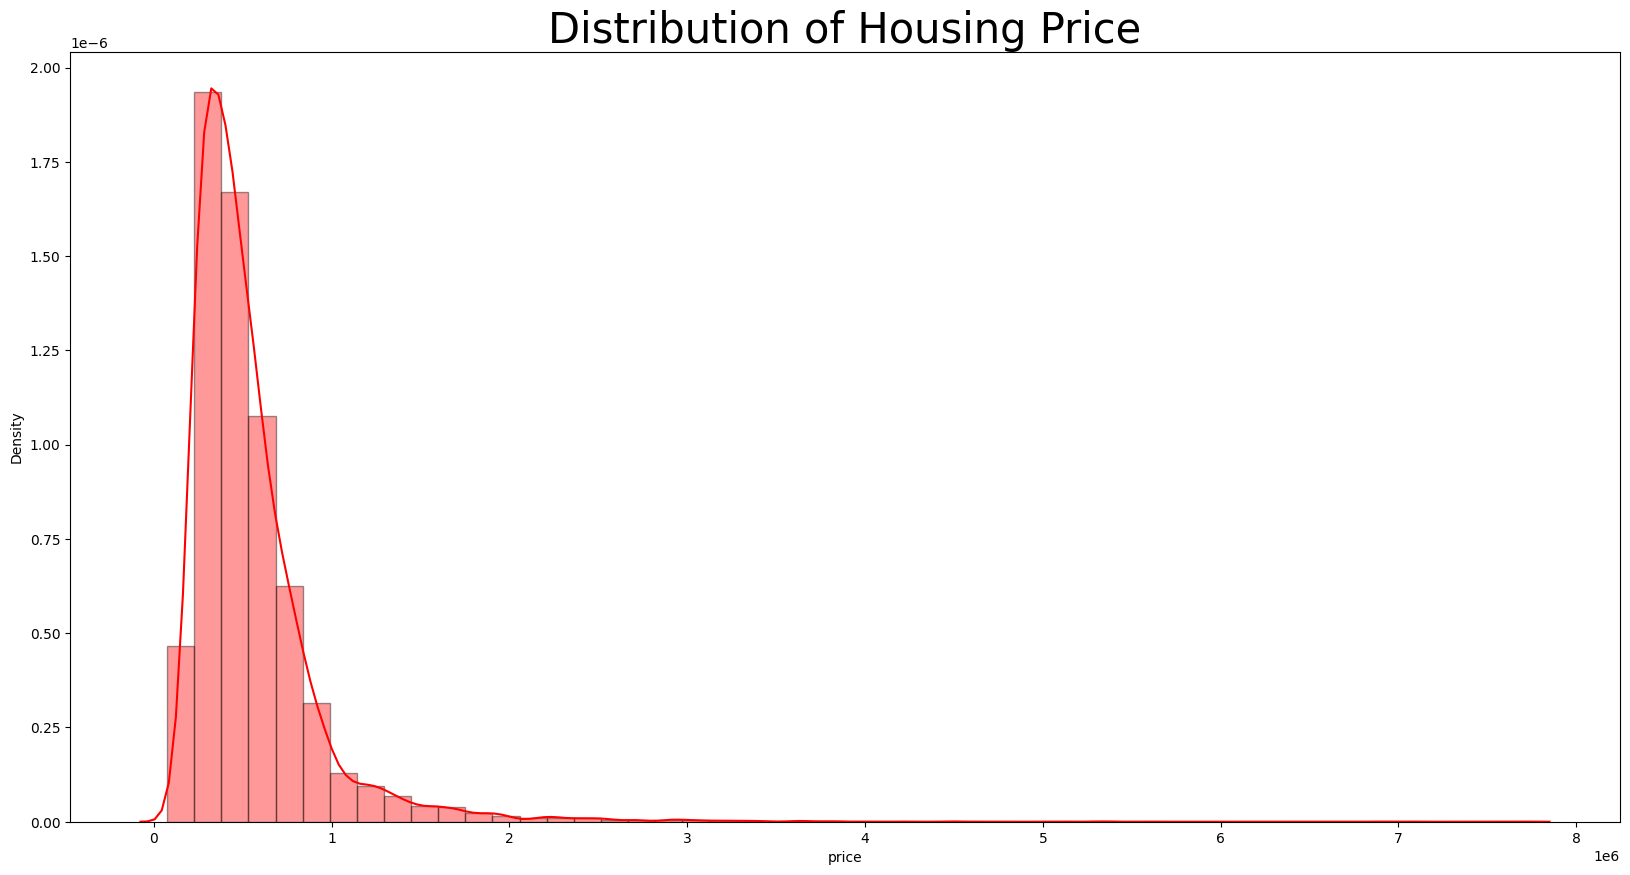

In [61]:
# Data Processing
plt.figure(figsize = (20,10))

plt.title("Distribution of Housing Price",fontsize = 30)
sns.distplot(data.price, color = 'r', hist_kws = dict(edgecolor = 'black', linewidth = 1))
plt.show()

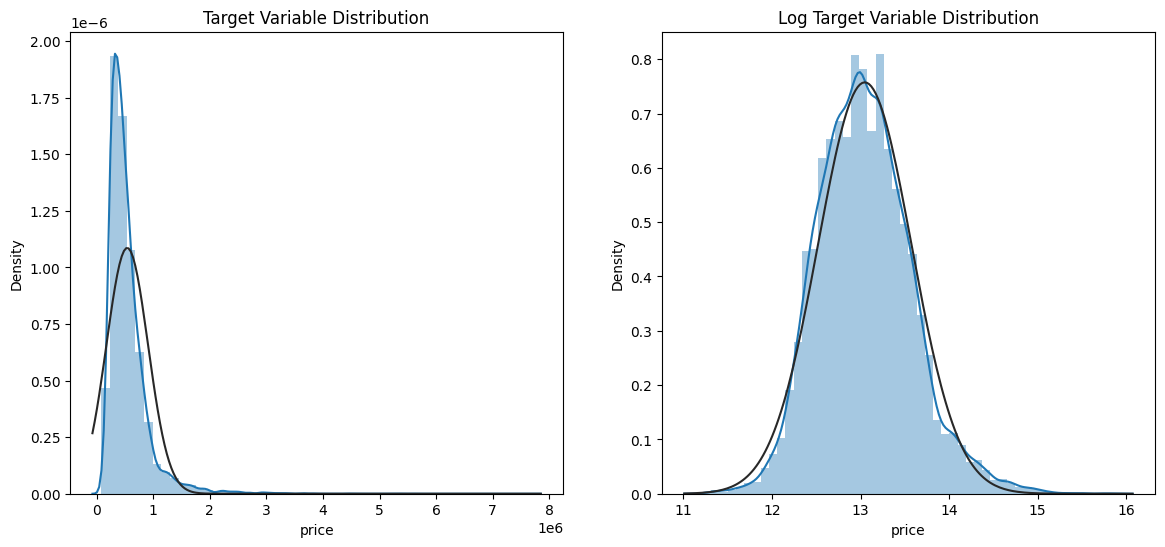

In [62]:
figure,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
figure.set_size_inches(14,6)

plt.subplot(1,2,1)

plt.title("Target Variable Distribution") #left skewed (심한 비대칭은 머신러닝 알고리즘이 학습을 잘 못하게 방해)
sns.distplot(data['price'], fit = norm, ax = ax1)

plt.subplot(1,2,2)

plt.title("Log Target Variable Distribution") #left skewed을 해결하는 대표적인 방법: 로그
sns.distplot(np.log(data['price']+1), fit = norm, ax = ax2)

plt.show()

In [63]:
# adjusting 'date' values 

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
file_path = r'C:\Users\corie\Desktop\ML_Project\Data\kc_house_data.csv'
data = pd.read_csv(file_path)

# Extract the first 8 characters from the 'date' column
data['date'] = data['date'].str[:8]

# Display the modified data
print("Data with modified 'date' column:")
print(data.head())


Data with modified 'date' column:
           id      date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  20141013  221900.0         3       1.00         1180      5650   
1  6414100192  20141209  538000.0         3       2.25         2570      7242   
2  5631500400  20150225  180000.0         2       1.00          770     10000   
3  2487200875  20141209  604000.0         4       3.00         1960      5000   
4  1954400510  20150218  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

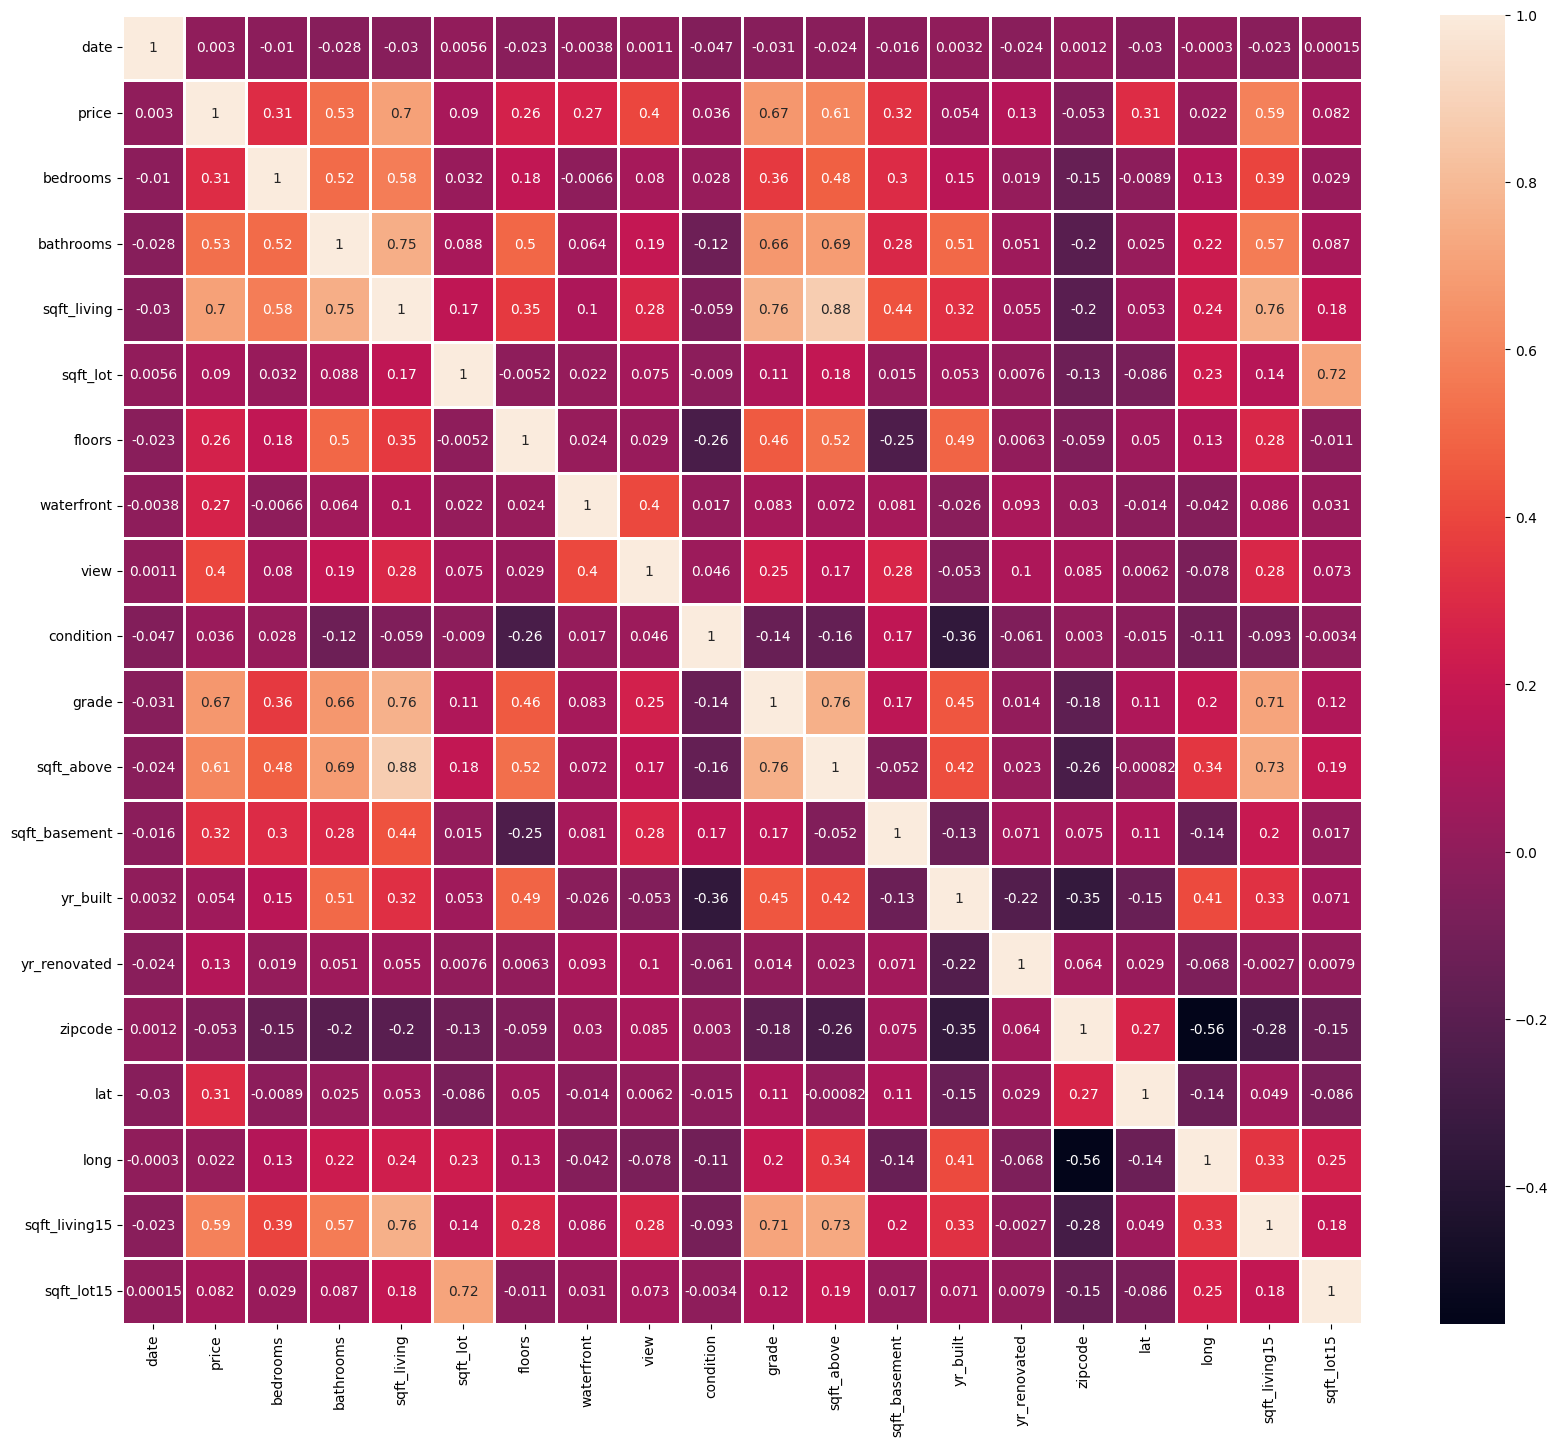

In [64]:
corr_data = data.drop(['id'], axis = 1)
plt.figure(figsize = (20, 17))
corr_matrix = corr_data.corr()

sns.heatmap(corr_matrix, annot = True, linewidth = 0.8)
plt.show()

In [65]:
cor = data.corr()  
cor_outlier = cor.index[abs(cor['price'])>=0.3]
cor_outlier    

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

<Axes: >

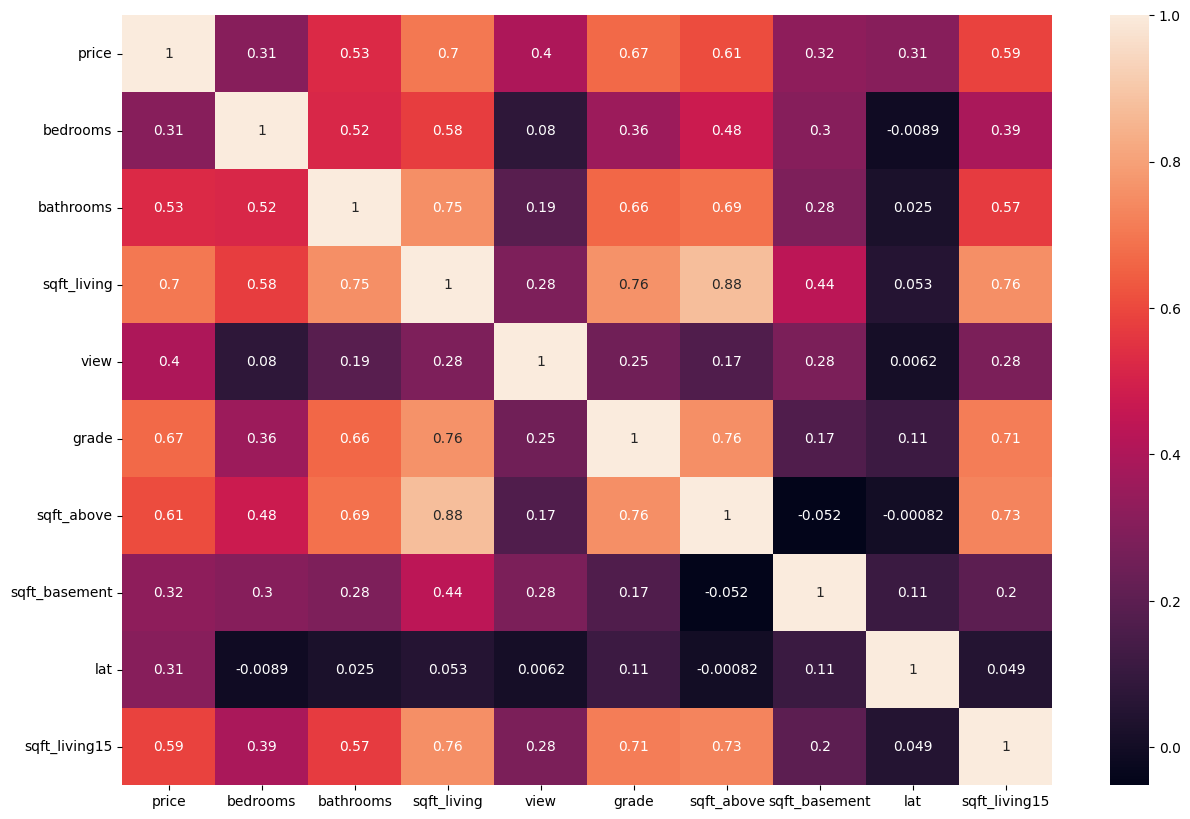

In [66]:
# heatmap of corr. value > 0.3

plt.figure(figsize = (15,10))
sns.heatmap(data[cor_outlier].corr(),annot=True)

In [67]:
# dropping data which is lower than 0.3 corr. 
data1 = data
data1 = data1.drop(['id','date','sqft_lot','floors','waterfront','yr_built','yr_renovated','zipcode','long','sqft_lot15','condition'], axis = 1)


In [68]:
data1

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,0,8,1600,0,47.5345,1410


In [69]:
price_corr = data.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date             0.003033
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


In [70]:
# dropping data which is lower than 0 corr.
data2 = data
data2 = data2.drop(['id','zipcode'], axis = 1)
data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [71]:
# Checking Null Values

data.isnull().sum()

# there is no null values so we can skip the process of eliminating null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#Use Simple Prediction Algorithms on the data

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and the target variable (y)
X = data1.drop('price', axis=1)
y = data1['price']

X2 = data2.drop('price', axis=1)
y2 = data2['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=999)

In [73]:
# Create an instance of the linear regression model
model_LR = LinearRegression()
model_LR2 = LinearRegression()

In [74]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=50)
model_RFR2 = RandomForestRegressor(n_estimators=50)

In [75]:
from sklearn import svm
 
model_SVR = svm.SVR()
model_SVR2 = svm.SVR()

In [76]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge regression model
model_Ridge = Ridge(alpha=0.5)
model_Ridge2 = Ridge(alpha=0.5)


In [77]:
import xgboost as xgb
xgbmodel = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100) # Regression model (XGBoost)
xgbmodel2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100) # Regression model (XGBoost)

In [92]:
#Store all the trained models in a list
models = [model_LR, model_RFR, model_SVR, model_Ridge, xgbmodel]
models2 = [model_LR2, model_RFR2, model_SVR2, model_Ridge2]
mseList=[]
r2List = []
#Run all the models on the dataset
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mseList.append(mse)
    r2List.append(r2)
    #Add the mse and r2 of the iteration to the list
    results1 = {
    'Model used': ['Linear Regression', 'Random Forest Regression', 'Support Vector Regression', 'Ridge Regression', 'XGBModel'],
    'Mean Squared Error': mseList,
    'Coefficient of Determination (R^2)': r2List,
    }
    print("Mean Squared Error:", mse)
    print("Coefficient of Determination (R^2):", r2)
    print("Model", model, "is trained and evaluated.")
    print()


Mean Squared Error: 46909113764.01221
Coefficient of Determination (R^2): 0.6399985767399272
Model LinearRegression() is trained and evaluated.

Mean Squared Error: 36014774198.41477
Coefficient of Determination (R^2): 0.7236065887954111
Model RandomForestRegressor(n_estimators=50) is trained and evaluated.

Mean Squared Error: 138423388443.90393
Coefficient of Determination (R^2): -0.06232270988922384
Model SVR() is trained and evaluated.

Mean Squared Error: 46910150707.767654
Coefficient of Determination (R^2): 0.639990618771894
Model Ridge(alpha=0.5) is trained and evaluated.

Mean Squared Error: 33920398850.478603
Coefficient of Determination (R^2): 0.7396797576446651
Model XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow

Run the models on the Dataset 2

In [96]:
mseList2=[]
r2List2 = []
for model in models2:
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    mse2 = mean_squared_error(y2_test, y2_pred)
    r2_2 = r2_score(y2_test, y2_pred)
    mseList2.append(mse2)
    r2List2.append(r2_2)
    results2 = {
    'Model used': ['Linear Regression', 'Random Forest Regression', 'Support Vector Regression', 'Ridge Regression'],
    'Mean Squared Error': mseList2,
    'Coefficient of Determination (R^2)': r2List2,
    }
    print("Mean Squared Error:", mse2)
    print("Coefficient of Determination (R^2):", r2_2)
    print("Second Model", model, "is trained and evaluated.")
    print()

Mean Squared Error: 39586146837.00412
Coefficient of Determination (R^2): 0.6961982851691206
Second Model LinearRegression() is trained and evaluated.

Mean Squared Error: 18895214711.631687
Coefficient of Determination (R^2): 0.854989710033476
Second Model RandomForestRegressor(n_estimators=50) is trained and evaluated.

Mean Squared Error: 139128482602.5994
Coefficient of Determination (R^2): -0.06773391637544535
Second Model SVR() is trained and evaluated.

Mean Squared Error: 39576518972.09473
Coefficient of Determination (R^2): 0.696272173690822
Second Model Ridge(alpha=0.5) is trained and evaluated.



In [97]:
import pandas as pd
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results1)
# Use sigmoid function to scale the MSE
results_df['Mean Squared Error'] = results_df['Mean Squared Error']/10000000000
#Sort by MSE
results_df.sort_values(by=['Mean Squared Error'], inplace=True)
results_df.head()

results_df2 = pd.DataFrame(results2)
results_df2['Mean Squared Error'] = results_df2['Mean Squared Error']/10000000000
results_df2.sort_values(by=['Mean Squared Error'], inplace=True)
results_df2.head()

,Model used,Mean Squared Error,Coefficient of Determination (R^2)
1,Random Forest Regression,1.889521,0.854990
3,Ridge Regression,3.957652,0.696272
0,Linear Regression,3.958615,0.696198
2,Support Vector Regression,13.912848,-0.067734


Text(0.5, 0, 'Mean Squared Error (in 10 billion)')

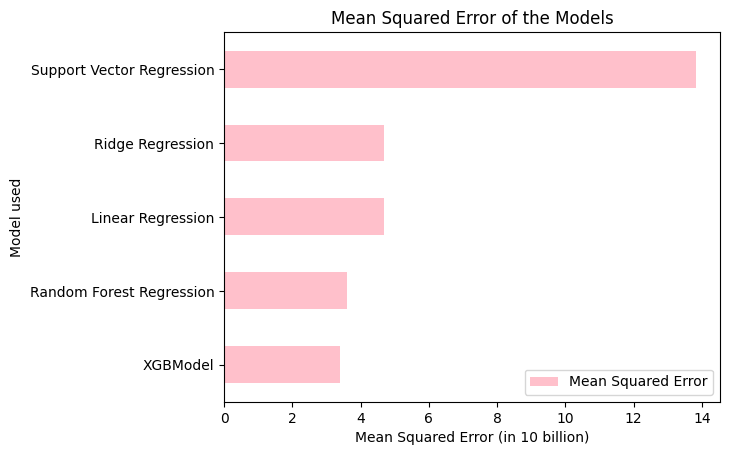

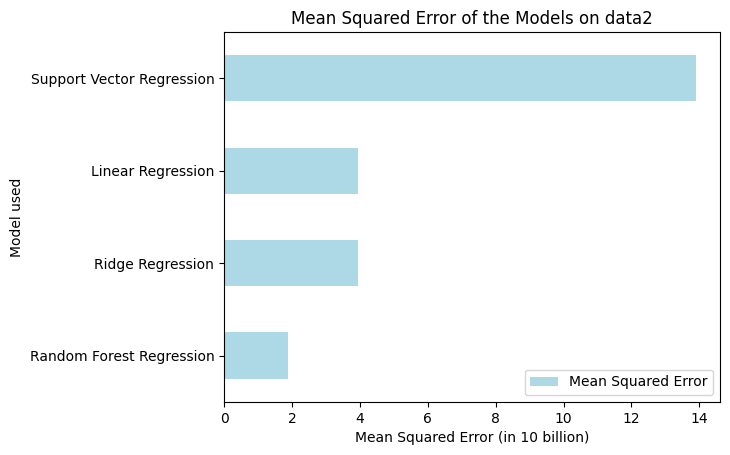

In [98]:

# Plot the MSE of the results DataFrame
results_df.plot(x='Model used', y='Mean Squared Error', kind='barh', color='pink')
# Add a title and axis labels
plt.title('Mean Squared Error of the Models')
plt.xlabel('Mean Squared Error (in billion)') 
#Add data2 to the plot
results_df2.plot(x='Model used', y='Mean Squared Error', kind='barh', color='lightblue')
plt.title('Mean Squared Error of the Models on data2')
plt.xlabel('Mean Squared Error (in billion)')

In [118]:
#Compare actual house prices with predicted prices for 5 random houses
#Predict one house price and run 10 times to see the difference
for i in range(10):
    random = np.random.randint(0, len(X2_test))
    print("Actual house price:", y2_test.iloc[random])
    print("Predicted house price:", model_RFR2.predict(X2_test.iloc[[random]]))
    print()


Actual house price: 552625.0
Predicted house price: [553608.]

Actual house price: 550000.0
Predicted house price: [524603.]

Actual house price: 340000.0
Predicted house price: [401455.32]

Actual house price: 400000.0
Predicted house price: [395821.]

Actual house price: 950000.0
Predicted house price: [865748.98]

Actual house price: 1425000.0
Predicted house price: [939853.76]

Actual house price: 279950.0
Predicted house price: [251253.]

Actual house price: 310000.0
Predicted house price: [354667.3]

Actual house price: 599000.0
Predicted house price: [624507.]

Actual house price: 295000.0
Predicted house price: [278051.]

